In [1]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import re
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/INEC_ESI/INEC_ESI/Metadatos_ESI_2022/esi_2022.csv", sep=';')
df_canton = pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/canton.xlsx")
df_provincia = pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/provincia.xlsx")
df_lugar = pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/lugar_proc.xlsx")
df_jefaturas= pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/jefaturas.xlsx")
df_ocu = pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/ocu.xlsx")
df_pais_c = pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/pais_c.xlsx")
df_pais_c1 = pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/pais_c1.xlsx")
df_pais_c2= pd.read_excel("C:/Users/Richard Edison/OneDrive/Documentos/Data Scienci Development/pais_c2.xlsx")

**Lista de las variables que predominan**

**Se elimina variables inecesarias**

In [3]:
df = df.drop(columns=['cont_prod', 'subcont_prod', 'cont_res', 'subcont_res', 'cont_nac', 'subcont_nac', 'cla_migr'])

In [4]:
df = df.iloc[:, 1:]
df

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,lug_prod,pais_res,jef_migr,pro_jefm,can_jefm,ocu_migr,edad
0,2,1,2022,4,20,2,218,1,5,32,32017,32,1,17,1701,66666,23
1,1,1,2022,5,26,2,218,1,5,756,756006,218,1,17,1701,55555,68
2,2,1,2022,12,8,1,218,2,5,170,170010,218,11,4,401,88888,14
3,2,1,2022,10,3,1,218,1,1,840,840095,218,12,9,901,4419,71
4,1,1,2022,2,1,2,218,1,5,724,724045,724,1,17,1701,9112,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,724013,840,12,9,901,77777,61
5052629,2,2,2022,5,14,1,840,1,5,840,840221,840,12,9,901,4419,43
5052630,2,2,2022,3,7,2,840,1,5,840,840095,840,12,9,901,5111,32
5052631,2,1,2022,12,27,2,218,1,3,604,604019,218,12,9,901,3413,56


**Lista de las variables que predominan**

**Se asigna significado a los valores de la variable "tip_movi": tipo de movimiento**

In [5]:
data = {
    'tip_movi': ['1', '2'],
    'tip_mov1': ["entradas", "salidas"],
}

df_tip_movi = pd.DataFrame(data)
df_tip_movi['tip_movi'] = df_tip_movi['tip_movi'].astype(int)
result = pd.merge(df, df_tip_movi, how="left", on=["tip_movi"])
result

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,lug_prod,pais_res,jef_migr,pro_jefm,can_jefm,ocu_migr,edad,tip_mov1
0,2,1,2022,4,20,2,218,1,5,32,32017,32,1,17,1701,66666,23,salidas
1,1,1,2022,5,26,2,218,1,5,756,756006,218,1,17,1701,55555,68,entradas
2,2,1,2022,12,8,1,218,2,5,170,170010,218,11,4,401,88888,14,salidas
3,2,1,2022,10,3,1,218,1,1,840,840095,218,12,9,901,4419,71,salidas
4,1,1,2022,2,1,2,218,1,5,724,724045,724,1,17,1701,9112,38,entradas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,724013,840,12,9,901,77777,61,salidas
5052629,2,2,2022,5,14,1,840,1,5,840,840221,840,12,9,901,4419,43,salidas
5052630,2,2,2022,3,7,2,840,1,5,840,840095,840,12,9,901,5111,32,salidas
5052631,2,1,2022,12,27,2,218,1,3,604,604019,218,12,9,901,3413,56,salidas


**Se asigna significado a los valores de la variable "tip_naci": tipo de nacionalidad**

In [6]:
data = {
    'tip_naci': ['1', '2'],
    'tip_naci1': ["ecuatorianos", "extranjeros"],
}

df_tip_naci = pd.DataFrame(data)
df_tip_naci['tip_naci'] = df_tip_naci['tip_naci'].astype(int)
result1 = pd.merge(result, df_tip_naci, how="left", on=["tip_naci"])
result1["contador"]= 1
result1

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,lug_prod,pais_res,jef_migr,pro_jefm,can_jefm,ocu_migr,edad,tip_mov1,tip_naci1,contador
0,2,1,2022,4,20,2,218,1,5,32,32017,32,1,17,1701,66666,23,salidas,ecuatorianos,1
1,1,1,2022,5,26,2,218,1,5,756,756006,218,1,17,1701,55555,68,entradas,ecuatorianos,1
2,2,1,2022,12,8,1,218,2,5,170,170010,218,11,4,401,88888,14,salidas,ecuatorianos,1
3,2,1,2022,10,3,1,218,1,1,840,840095,218,12,9,901,4419,71,salidas,ecuatorianos,1
4,1,1,2022,2,1,2,218,1,5,724,724045,724,1,17,1701,9112,38,entradas,ecuatorianos,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,724013,840,12,9,901,77777,61,salidas,extranjeros,1
5052629,2,2,2022,5,14,1,840,1,5,840,840221,840,12,9,901,4419,43,salidas,extranjeros,1
5052630,2,2,2022,3,7,2,840,1,5,840,840095,840,12,9,901,5111,32,salidas,extranjeros,1
5052631,2,1,2022,12,27,2,218,1,3,604,604019,218,12,9,901,3413,56,salidas,ecuatorianos,1


**Entrada y salida de Ecuatorianos y Extranjeros**

In [7]:
result2 = result1.groupby(["tip_mov1", "tip_naci1"])["contador"].sum().reset_index()
result2

,tip_mov1,tip_naci1,contador
0,entradas,ecuatorianos,1243713
1,entradas,extranjeros,1213831
2,salidas,ecuatorianos,1357644
3,salidas,extranjeros,1237445


**Se asigna significado a los valores de la variable "sex_migr": sexo**

In [8]:
data = {
    'sex_migr': ['1', '2', '3'],
    'sex_migr1': ["hombres", "mujeres", "indefinido"],
}

df_sex_migr = pd.DataFrame(data)
df_sex_migr['sex_migr'] = df_sex_migr['sex_migr'].astype(int)
result3 = pd.merge(result1, df_sex_migr, how="left", on=["sex_migr"])
result3


,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,pais_res,jef_migr,pro_jefm,can_jefm,ocu_migr,edad,tip_mov1,tip_naci1,contador,sex_migr1
0,2,1,2022,4,20,2,218,1,5,32,...,32,1,17,1701,66666,23,salidas,ecuatorianos,1,mujeres
1,1,1,2022,5,26,2,218,1,5,756,...,218,1,17,1701,55555,68,entradas,ecuatorianos,1,mujeres
2,2,1,2022,12,8,1,218,2,5,170,...,218,11,4,401,88888,14,salidas,ecuatorianos,1,hombres
3,2,1,2022,10,3,1,218,1,1,840,...,218,12,9,901,4419,71,salidas,ecuatorianos,1,hombres
4,1,1,2022,2,1,2,218,1,5,724,...,724,1,17,1701,9112,38,entradas,ecuatorianos,1,mujeres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,840,12,9,901,77777,61,salidas,extranjeros,1,hombres
5052629,2,2,2022,5,14,1,840,1,5,840,...,840,12,9,901,4419,43,salidas,extranjeros,1,hombres
5052630,2,2,2022,3,7,2,840,1,5,840,...,840,12,9,901,5111,32,salidas,extranjeros,1,mujeres
5052631,2,1,2022,12,27,2,218,1,3,604,...,218,12,9,901,3413,56,salidas,ecuatorianos,1,mujeres


**Se asigna significado a los valores de la variable "nac_migr": nacionalidad**

In [9]:
df_nac_migr = pd.DataFrame(df_pais_c)
df_nac_migr['nac_migr'] = df_nac_migr['nac_migr'].astype(int)
result4 = pd.merge(result3, df_nac_migr, how="left", on=["nac_migr"])
result4

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,jef_migr,pro_jefm,can_jefm,ocu_migr,edad,tip_mov1,tip_naci1,contador,sex_migr1,nac_migr1
0,2,1,2022,4,20,2,218,1,5,32,...,1,17,1701,66666,23,salidas,ecuatorianos,1,mujeres,Ecuador
1,1,1,2022,5,26,2,218,1,5,756,...,1,17,1701,55555,68,entradas,ecuatorianos,1,mujeres,Ecuador
2,2,1,2022,12,8,1,218,2,5,170,...,11,4,401,88888,14,salidas,ecuatorianos,1,hombres,Ecuador
3,2,1,2022,10,3,1,218,1,1,840,...,12,9,901,4419,71,salidas,ecuatorianos,1,hombres,Ecuador
4,1,1,2022,2,1,2,218,1,5,724,...,1,17,1701,9112,38,entradas,ecuatorianos,1,mujeres,Ecuador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,12,9,901,77777,61,salidas,extranjeros,1,hombres,Estados Unidos de América
5052629,2,2,2022,5,14,1,840,1,5,840,...,12,9,901,4419,43,salidas,extranjeros,1,hombres,Estados Unidos de América
5052630,2,2,2022,3,7,2,840,1,5,840,...,12,9,901,5111,32,salidas,extranjeros,1,mujeres,Estados Unidos de América
5052631,2,1,2022,12,27,2,218,1,3,604,...,12,9,901,3413,56,salidas,ecuatorianos,1,mujeres,Ecuador


**Se asigna significado a los valores de la variable "via_tran": medio de transporte**

In [10]:
data = {
    'via_tran': ['1', '2', '3', '4'],
    'via_tran1': ["Vía Aérea", "Vía Terrestre", "Vía Marítima","Vía Fluvial" ],
}

df_via_tran = pd.DataFrame(data)
df_via_tran['via_tran'] = df_via_tran['via_tran'].astype(int)
result5 = pd.merge(result4, df_via_tran, how="left", on=["via_tran"])
result5

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,pro_jefm,can_jefm,ocu_migr,edad,tip_mov1,tip_naci1,contador,sex_migr1,nac_migr1,via_tran1
0,2,1,2022,4,20,2,218,1,5,32,...,17,1701,66666,23,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea
1,1,1,2022,5,26,2,218,1,5,756,...,17,1701,55555,68,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea
2,2,1,2022,12,8,1,218,2,5,170,...,4,401,88888,14,salidas,ecuatorianos,1,hombres,Ecuador,Vía Terrestre
3,2,1,2022,10,3,1,218,1,1,840,...,9,901,4419,71,salidas,ecuatorianos,1,hombres,Ecuador,Vía Aérea
4,1,1,2022,2,1,2,218,1,5,724,...,17,1701,9112,38,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,9,901,77777,61,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea
5052629,2,2,2022,5,14,1,840,1,5,840,...,9,901,4419,43,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea
5052630,2,2,2022,3,7,2,840,1,5,840,...,9,901,5111,32,salidas,extranjeros,1,mujeres,Estados Unidos de América,Vía Aérea
5052631,2,1,2022,12,27,2,218,1,3,604,...,9,901,3413,56,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea


**Se asigna significado a los valores de la variable "mot_viam": motivo de viaje**

In [11]:
data = {
    'mot_viam': ['1', '2', '3', '4', '5', '6', '7', '9' ],
    'mot_viam1': ["Turismo", "Negocios", "Eventos","Estudios", "Residencia", "Transeúnte", "Tripulación", "otros" ],
}

df_mot_viam1 = pd.DataFrame(data)
df_mot_viam1['mot_viam'] = df_mot_viam1['mot_viam'].astype(int)
result6 = pd.merge(result5, df_mot_viam1, how="left", on=["mot_viam"])
result6

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,can_jefm,ocu_migr,edad,tip_mov1,tip_naci1,contador,sex_migr1,nac_migr1,via_tran1,mot_viam1
0,2,1,2022,4,20,2,218,1,5,32,...,1701,66666,23,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia
1,1,1,2022,5,26,2,218,1,5,756,...,1701,55555,68,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia
2,2,1,2022,12,8,1,218,2,5,170,...,401,88888,14,salidas,ecuatorianos,1,hombres,Ecuador,Vía Terrestre,Residencia
3,2,1,2022,10,3,1,218,1,1,840,...,901,4419,71,salidas,ecuatorianos,1,hombres,Ecuador,Vía Aérea,Turismo
4,1,1,2022,2,1,2,218,1,5,724,...,1701,9112,38,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,901,77777,61,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia
5052629,2,2,2022,5,14,1,840,1,5,840,...,901,4419,43,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia
5052630,2,2,2022,3,7,2,840,1,5,840,...,901,5111,32,salidas,extranjeros,1,mujeres,Estados Unidos de América,Vía Aérea,Residencia
5052631,2,1,2022,12,27,2,218,1,3,604,...,901,3413,56,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Eventos


2457544
2595089


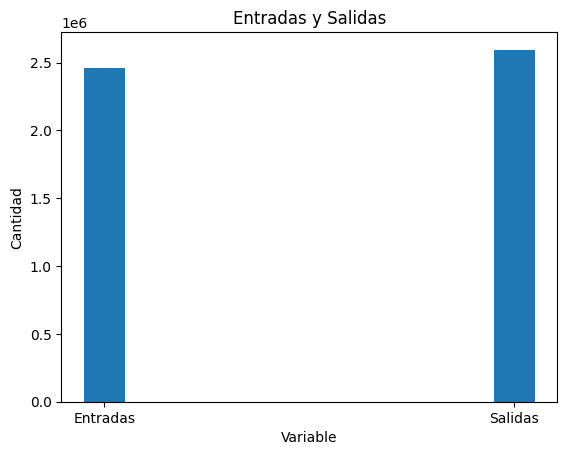

In [12]:
entradas = 0
salidas = 0

for valor in result6["tip_movi"]:
    if valor==1:
        entradas += 1
    if valor==2:
        salidas+=1
print (entradas)

print (salidas)
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt

# Entradas y salidas
entradas = 2457544
salidas = 2595089

# Etiquetas
etiquetas = ["Entradas", "Salidas"]

# Define el ancho de la barra (por ejemplo, 0.5)
ancho_barra = 0.1

# Crear el gráfico de barras
plt.bar(etiquetas, [entradas, salidas], width=ancho_barra)

# Añadir título y etiquetas
plt.title("Entradas y Salidas")
plt.xlabel("Variable")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.show()
ecuatorianos = 0
extranjeros = 0

for valor in result6["tip_naci"]:
    if valor==1:
        ecuatorianos += 1
    if valor==2:
        extranjeros+=1

In [13]:
ecuatorianos = 0
extranjeros = 0

for valor in result6["tip_naci"]:
    if valor==1:
        ecuatorianos += 1
    if valor==2:
        extranjeros+=1


In [14]:
print (ecuatorianos)

print (extranjeros)

2601357
2451276


In [15]:
df_anio_movi = pd.DataFrame(data)
df_anio_movi

,mot_viam,mot_viam1
0,1,Turismo
1,2,Negocios
2,3,Eventos
3,4,Estudios
4,5,Residencia
5,6,Transeúnte
6,7,Tripulación
7,9,otros


In [16]:
mujeres = 0
hombres = 0
indefinido = 0

for valor in result6["sex_migr"]:
    if valor==2:
        mujeres += 1
    if valor==1:
        hombres+=1
    if valor== 3:
        indefinido+= 1
print (mujeres)

print (hombres)

print (indefinido)

2422861
2629534
238


In [17]:
mujeres = 0
hombres = 0
indefinido = 0

for valor in result6["sex_migr"]:
    if valor==2:
        mujeres += 1
    if valor==1:
        hombres+=1
    if valor== 3:
        indefinido+= 1
result6["contador2"]= 1
result6

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,ocu_migr,edad,tip_mov1,tip_naci1,contador,sex_migr1,nac_migr1,via_tran1,mot_viam1,contador2
0,2,1,2022,4,20,2,218,1,5,32,...,66666,23,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,1
1,1,1,2022,5,26,2,218,1,5,756,...,55555,68,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,1
2,2,1,2022,12,8,1,218,2,5,170,...,88888,14,salidas,ecuatorianos,1,hombres,Ecuador,Vía Terrestre,Residencia,1
3,2,1,2022,10,3,1,218,1,1,840,...,4419,71,salidas,ecuatorianos,1,hombres,Ecuador,Vía Aérea,Turismo,1
4,1,1,2022,2,1,2,218,1,5,724,...,9112,38,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,77777,61,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,1
5052629,2,2,2022,5,14,1,840,1,5,840,...,4419,43,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,1
5052630,2,2,2022,3,7,2,840,1,5,840,...,5111,32,salidas,extranjeros,1,mujeres,Estados Unidos de América,Vía Aérea,Residencia,1
5052631,2,1,2022,12,27,2,218,1,3,604,...,3413,56,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Eventos,1


In [18]:
result7 = result6.groupby(["tip_mov1", "tip_naci1", "sex_migr1", "via_tran1", "mot_viam1"])["contador2"].sum().reset_index()
result7

,tip_mov1,tip_naci1,sex_migr1,via_tran1,mot_viam1,contador2
0,entradas,ecuatorianos,hombres,Vía Aérea,Estudios,18
1,entradas,ecuatorianos,hombres,Vía Aérea,Eventos,10824
2,entradas,ecuatorianos,hombres,Vía Aérea,Negocios,28
3,entradas,ecuatorianos,hombres,Vía Aérea,Residencia,434462
4,entradas,ecuatorianos,hombres,Vía Aérea,Tripulación,909
...,...,...,...,...,...,...
190,salidas,extranjeros,mujeres,Vía Terrestre,Residencia,76439
191,salidas,extranjeros,mujeres,Vía Terrestre,Transeúnte,30
192,salidas,extranjeros,mujeres,Vía Terrestre,Tripulación,3
193,salidas,extranjeros,mujeres,Vía Terrestre,Turismo,1919


In [19]:
result8 = result6.groupby(["tip_mov1", "tip_naci1", "sex_migr1"])["contador2"].sum().reset_index()
result8

,tip_mov1,tip_naci1,sex_migr1,contador2
0,entradas,ecuatorianos,hombres,607972
1,entradas,ecuatorianos,mujeres,635741
2,entradas,extranjeros,hombres,672539
3,entradas,extranjeros,indefinido,115
4,entradas,extranjeros,mujeres,541177
5,salidas,ecuatorianos,hombres,669927
6,salidas,ecuatorianos,mujeres,687717
7,salidas,extranjeros,hombres,679096
8,salidas,extranjeros,indefinido,123
9,salidas,extranjeros,mujeres,558226


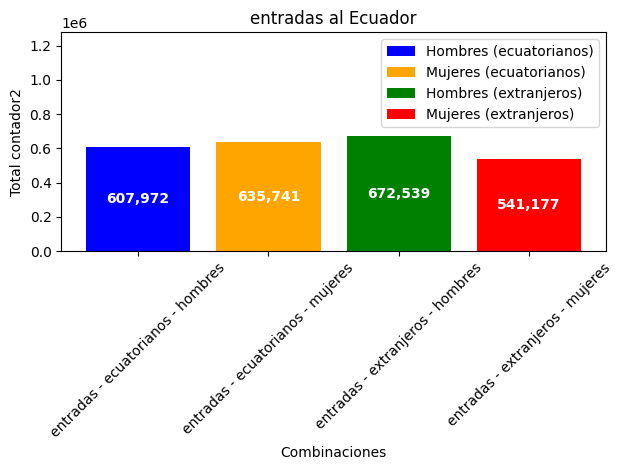

In [20]:
import matplotlib.pyplot as plt

# Datos originales
tip_mov1 = ['entradas', 'entradas']
tip_naci1 = ['ecuatorianos', 'ecuatorianos']
sex_migr1 = ['hombres', 'mujeres']
contador2 = [607972, 635741]

# Nuevos datos
tip_mov1.extend(['entradas', 'entradas'])
tip_naci1.extend(['extranjeros', 'extranjeros'])
sex_migr1.extend(['hombres', 'mujeres'])
contador2.extend([672539, 541177])
# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar los datos
bars = ax.bar(range(len(tip_mov1)), contador2, color=['blue', 'orange', 'green', 'red'])

# Etiquetas y título
ax.set_xlabel('Combinaciones')
ax.set_ylabel('Total contador2')
ax.set_title('entradas al Ecuador')
ax.set_xticks(range(len(tip_mov1)))
ax.set_xticklabels(['{} - {} - {}'.format(t1, t2, t3) for t1, t2, t3 in zip(tip_mov1, tip_naci1, sex_migr1)], rotation=45)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval / 2, f'{yval:,}', ha='center', va='center', color='white', fontweight='bold')
    
# Añadir leyenda manualmente
ax.legend(bars, ['Hombres (ecuatorianos)', 'Mujeres (ecuatorianos)', 'Hombres (extranjeros)', 'Mujeres (extranjeros)'])

# Mostrar gráfico
ax.set_ylim(0, max(contador2) * 1.9)  # Ajusta aquí para aumentar el rango

plt.tight_layout()
plt.show()

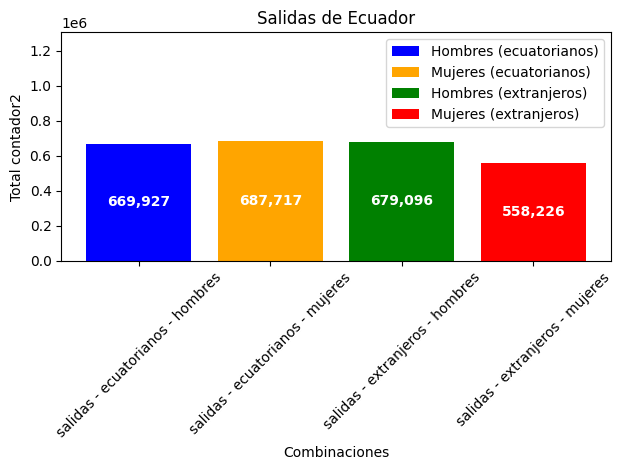

In [21]:
# Datos originales
tip_mov1 = ['salidas', 'salidas']
tip_naci1 = ['ecuatorianos', 'ecuatorianos']
sex_migr1 = ['hombres', 'mujeres']
contador2 = [669927, 687717]

# Nuevos datos
tip_mov1.extend(['salidas', 'salidas'])
tip_naci1.extend(['extranjeros', 'extranjeros'])
sex_migr1.extend(['hombres', 'mujeres'])
contador2.extend([679096, 558226])

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar los datos
bars = ax.bar(range(len(tip_mov1)), contador2, color=['blue', 'orange', 'green', 'red'])
# Etiquetas y título
ax.set_xlabel('Combinaciones')
ax.set_ylabel('Total contador2')
ax.set_title('Salidas de Ecuador')
ax.set_xticks(range(len(tip_mov1)))
ax.set_xticklabels(['{} - {} - {}'.format(t1, t2, t3) for t1, t2, t3 in zip(tip_mov1, tip_naci1, sex_migr1)], rotation=45)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval / 2, f'{yval:,}', ha='center', va='center', color='white', fontweight='bold')

# Añadir leyenda manualmente
ax.legend(bars, ['Hombres (ecuatorianos)', 'Mujeres (ecuatorianos)', 'Hombres (extranjeros)', 'Mujeres (extranjeros)'])

# Mostrar gráfico
ax.set_ylim(0, max(contador2) * 1.9)  # Ajusta aquí para aumentar el rango
plt.tight_layout()
plt.show()

In [22]:
result9 = result6.groupby(["tip_mov1", "tip_naci1", "mot_viam1"])["contador2"].sum().reset_index()
result9

,tip_mov1,tip_naci1,mot_viam1,contador2
0,entradas,ecuatorianos,Estudios,35
1,entradas,ecuatorianos,Eventos,23933
2,entradas,ecuatorianos,Negocios,121
3,entradas,ecuatorianos,Residencia,1184541
4,entradas,ecuatorianos,Tripulación,1964
5,entradas,ecuatorianos,Turismo,13832
6,entradas,ecuatorianos,otros,19287
7,entradas,extranjeros,Estudios,1805
8,entradas,extranjeros,Eventos,90933
9,entradas,extranjeros,Negocios,30246


In [23]:
maximo_columna1 = result9['contador2'].max()

print (maximo_columna1)
# Supongamos que tienes un DataFrame llamado result8
# Crear un ranking de la columna 'contador2' en orden descendente
ranking = result9['contador2'].sort_values(ascending=False)

# Si deseas incluir el índice en el ranking, puedes usar reset_index()
ranking_con_indice = ranking.reset_index(drop=True)
print (ranking_con_indice)

1184541
0     1184541
1     1040146
2      996893
3      724881
4      254357
5      182273
6      110281
7       90933
8       83816
9       68729
10      53560
11      47056
12      30246
13      26521
14      25753
15      25378
16      23933
17      19287
18      15371
19      14297
20      13832
21       8498
22       4228
23       2040
24       1964
25       1805
26       1477
27        381
28        121
29         35
Name: contador2, dtype: int64


In [24]:
# Crear una nueva columna concatenando las columnas relevantes
result9['combinacion'] = result9['tip_mov1'] + ' ' + result9['tip_naci1'] + ' ' + result9['mot_viam1']

# Ordenar el DataFrame en función de la nueva columna 'combinacion' y 'contador2'
ranking = result9.sort_values(by=['combinacion', 'contador2'], ascending=[True, False])

# Mostrar el DataFrame resultante
print(ranking[['combinacion', 'contador2']])

                          combinacion  contador2
0      entradas ecuatorianos Estudios         35
1       entradas ecuatorianos Eventos      23933
2      entradas ecuatorianos Negocios        121
3    entradas ecuatorianos Residencia    1184541
4   entradas ecuatorianos Tripulación       1964
5       entradas ecuatorianos Turismo      13832
6         entradas ecuatorianos otros      19287
7       entradas extranjeros Estudios       1805
8        entradas extranjeros Eventos      90933
9       entradas extranjeros Negocios      30246
10    entradas extranjeros Residencia     254357
11    entradas extranjeros Transeúnte       2040
12   entradas extranjeros Tripulación      25753
13       entradas extranjeros Turismo     724881
14         entradas extranjeros otros      83816
15      salidas ecuatorianos Estudios      26521
16       salidas ecuatorianos Eventos      53560
17      salidas ecuatorianos Negocios      15371
18    salidas ecuatorianos Residencia     182273
19   salidas ecuator

In [25]:
# Crear una nueva columna concatenando las columnas relevantes
result9['combinacion'] = result9['tip_mov1'] + ' ' + result9['tip_naci1'] + ' ' + result9['mot_viam1']

# Ordenar el DataFrame en función de la nueva columna 'combinacion' y 'contador2' en orden descendente
ranking = result9.sort_values(by=['contador2'], ascending=False)

# Mostrar el DataFrame resultante
print(ranking[['combinacion', 'contador2']])

                          combinacion  contador2
3    entradas ecuatorianos Residencia    1184541
25     salidas extranjeros Residencia    1040146
20       salidas ecuatorianos Turismo     996893
13       entradas extranjeros Turismo     724881
10    entradas extranjeros Residencia     254357
18    salidas ecuatorianos Residencia     182273
28        salidas extranjeros Turismo     110281
8        entradas extranjeros Eventos      90933
14         entradas extranjeros otros      83816
21         salidas ecuatorianos otros      68729
16       salidas ecuatorianos Eventos      53560
29          salidas extranjeros otros      47056
9       entradas extranjeros Negocios      30246
15      salidas ecuatorianos Estudios      26521
12   entradas extranjeros Tripulación      25753
23        salidas extranjeros Eventos      25378
1       entradas ecuatorianos Eventos      23933
6         entradas ecuatorianos otros      19287
17      salidas ecuatorianos Negocios      15371
19   salidas ecuator

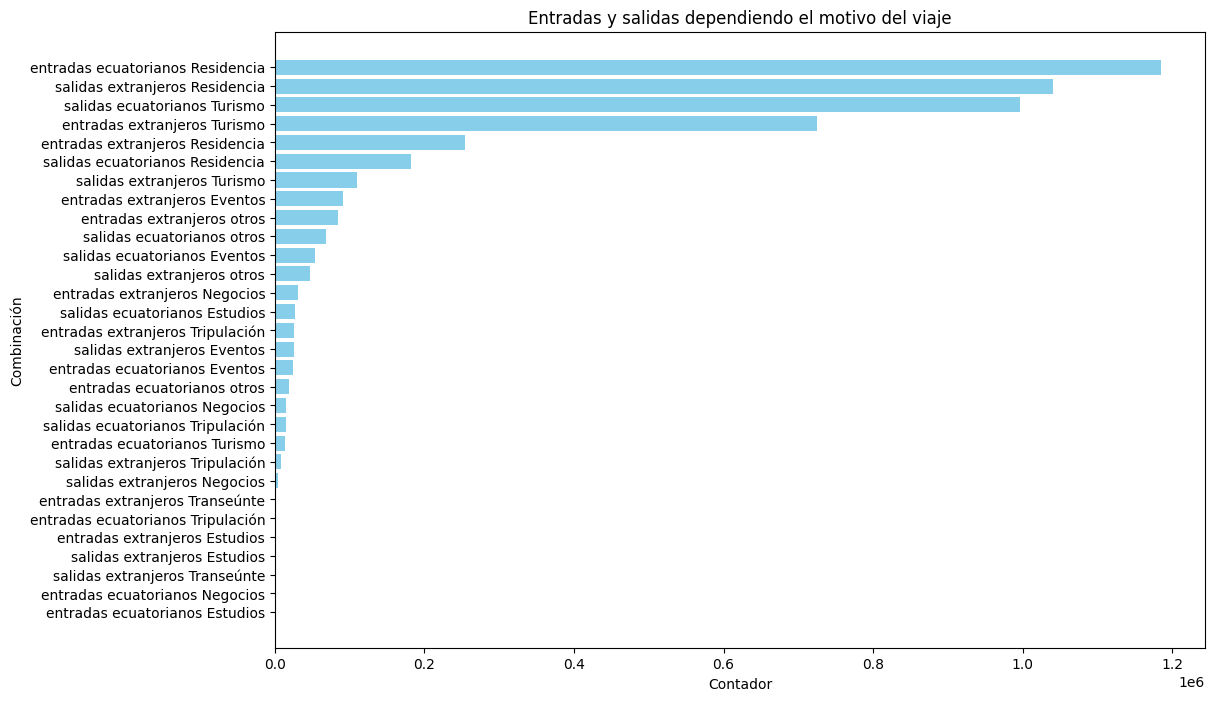

In [26]:
# Obtener los datos para graficar
combinaciones = ranking['combinacion']
contador2 = ranking['contador2']

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(combinaciones, contador2, color='skyblue')
plt.xlabel('Contador')
plt.ylabel('Combinación')
plt.title('Entradas y salidas dependiendo el motivo del viaje')
plt.gca().invert_yaxis()  # Invertir el eje y para que las combinaciones más altas estén en la parte superior
plt.show()



                          combinacion  contador2
3    entradas ecuatorianos Residencia    1184541
13       entradas extranjeros Turismo     724881
10    entradas extranjeros Residencia     254357
8        entradas extranjeros Eventos      90933
14         entradas extranjeros otros      83816
9       entradas extranjeros Negocios      30246
12   entradas extranjeros Tripulación      25753
1       entradas ecuatorianos Eventos      23933
6         entradas ecuatorianos otros      19287
5       entradas ecuatorianos Turismo      13832
11    entradas extranjeros Transeúnte       2040
4   entradas ecuatorianos Tripulación       1964
7       entradas extranjeros Estudios       1805
2      entradas ecuatorianos Negocios        121
0      entradas ecuatorianos Estudios         35


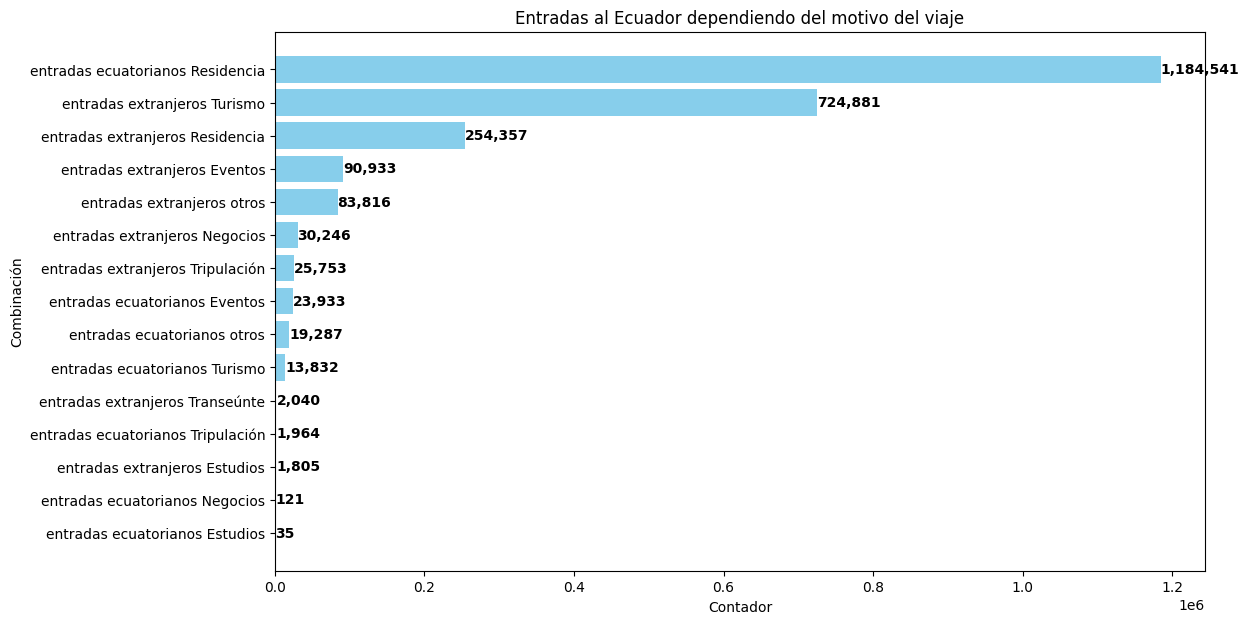

In [27]:
# Crear una nueva columna concatenando las columnas relevantes
result9['combinacion'] = result9['tip_mov1'] + ' ' + result9['tip_naci1'] + ' ' + result9['mot_viam1']

# Filtrar solo las filas cuya combinación comienza con 'entradas'
entradas_df = result9[result9['combinacion'].str.startswith('entradas')]

# Ordenar el DataFrame en función de 'contador2' en orden descendente
ranking_entradas = entradas_df.sort_values(by=['contador2'], ascending=False)

# Mostrar el DataFrame resultante
print(ranking_entradas[['combinacion', 'contador2']])

# Obtener los datos para graficar
combinaciones = ranking_entradas['combinacion']
contador2 = ranking_entradas['contador2']
# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
bars = plt.barh(combinaciones, contador2, color='skyblue')
plt.xlabel('Contador')
plt.ylabel('Combinación')
plt.title('Entradas al Ecuador dependiendo del motivo del viaje')
plt.gca().invert_yaxis()  # Invertir el eje y para que las combinaciones más altas estén en la parte superior

# Añadir texto al lado de cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}', 
             va='center', ha='left', color='black', fontweight='bold')

plt.show()

                         combinacion  contador2
25    salidas extranjeros Residencia    1040146
20      salidas ecuatorianos Turismo     996893
18   salidas ecuatorianos Residencia     182273
28       salidas extranjeros Turismo     110281
21        salidas ecuatorianos otros      68729
16      salidas ecuatorianos Eventos      53560
29         salidas extranjeros otros      47056
15     salidas ecuatorianos Estudios      26521
23       salidas extranjeros Eventos      25378
17     salidas ecuatorianos Negocios      15371
19  salidas ecuatorianos Tripulación      14297
27   salidas extranjeros Tripulación       8498
24      salidas extranjeros Negocios       4228
22      salidas extranjeros Estudios       1477
26    salidas extranjeros Transeúnte        381


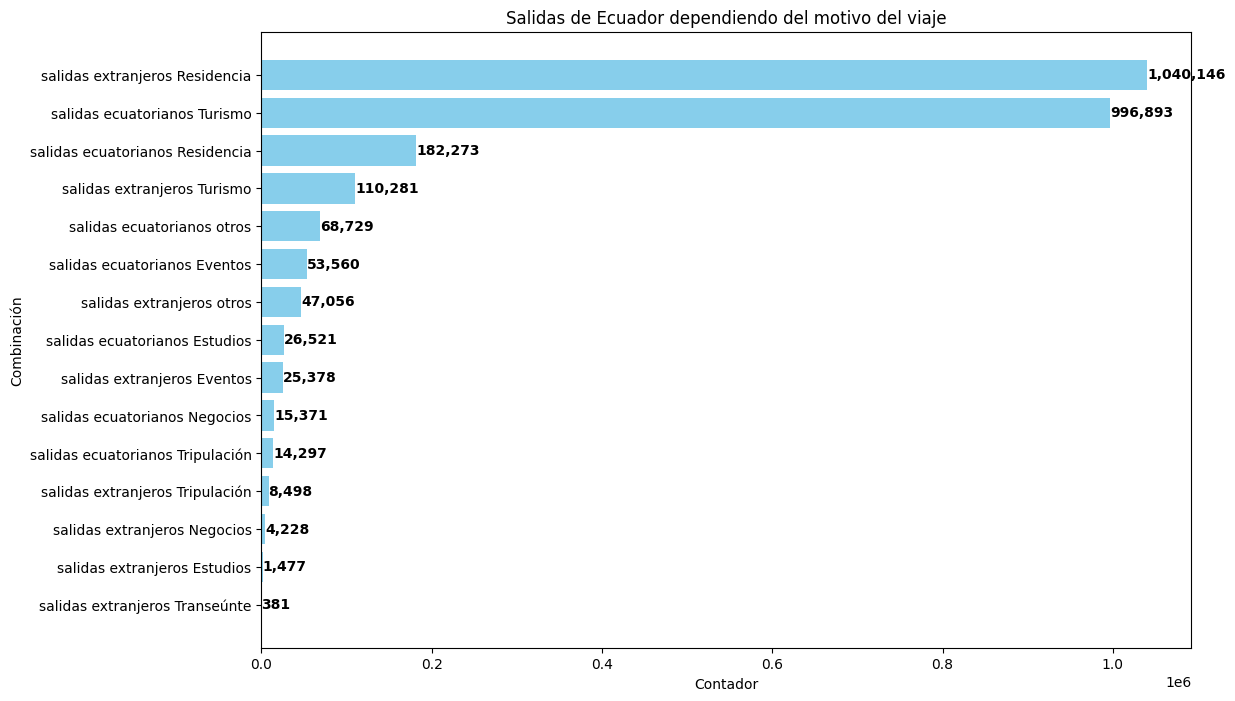

In [28]:
# Crear una nueva columna concatenando las columnas relevantes
result9['combinacion'] = result9['tip_mov1'] + ' ' + result9['tip_naci1'] + ' ' + result9['mot_viam1']

# Filtrar solo las filas cuya combinación comienza con 'salidas'
salidas_df = result9[result9['combinacion'].str.startswith('salidas')]

# Ordenar el DataFrame en función de 'contador2' en orden descendente
ranking_salidas = salidas_df.sort_values(by=['contador2'], ascending=False)

# Mostrar el DataFrame resultante
print(ranking_salidas[['combinacion', 'contador2']])

# Obtener los datos para graficar
combinaciones = ranking_salidas['combinacion']
contador2 = ranking_salidas['contador2']
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.barh(combinaciones, contador2, color='skyblue')
plt.xlabel('Contador')
plt.ylabel('Combinación')
plt.title('Salidas de Ecuador dependiendo del motivo del viaje')
plt.gca().invert_yaxis()  # Invertir el eje y para que las combinaciones más altas estén en la parte superior

# Añadir texto al lado de cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}', 
             va='center', ha='left', color='black', fontweight='bold')

plt.show()

**Se asigna significado a los valores de la variable "pais_prod": pais de procedencia destino**

In [29]:
df_paisprod = pd.DataFrame(df_pais_c1)
df_paisprod['pais_prod'] = df_paisprod['pais_prod'].astype(int)
paisprod_res = pd.merge(result6, df_paisprod, how="left", on=["pais_prod"])
paisprod_res

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,edad,tip_mov1,tip_naci1,contador,sex_migr1,nac_migr1,via_tran1,mot_viam1,contador2,pais_prod1
0,2,1,2022,4,20,2,218,1,5,32,...,23,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,1,Argentina
1,1,1,2022,5,26,2,218,1,5,756,...,68,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,1,Suiza
2,2,1,2022,12,8,1,218,2,5,170,...,14,salidas,ecuatorianos,1,hombres,Ecuador,Vía Terrestre,Residencia,1,Colombia
3,2,1,2022,10,3,1,218,1,1,840,...,71,salidas,ecuatorianos,1,hombres,Ecuador,Vía Aérea,Turismo,1,Estados Unidos de América
4,1,1,2022,2,1,2,218,1,5,724,...,38,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,1,España
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,61,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,1,España
5052629,2,2,2022,5,14,1,840,1,5,840,...,43,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,1,Estados Unidos de América
5052630,2,2,2022,3,7,2,840,1,5,840,...,32,salidas,extranjeros,1,mujeres,Estados Unidos de América,Vía Aérea,Residencia,1,Estados Unidos de América
5052631,2,1,2022,12,27,2,218,1,3,604,...,56,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Eventos,1,Perú


**Se asigna significado a los valores de la variable "pais_res": pais de residencia**

In [30]:
df_paisres = pd.DataFrame(df_pais_c2)
df_paisres['pais_res'] = df_paisres['pais_res'].astype(int)
paisres_res = pd.merge(paisprod_res, df_paisres, how="left", on=["pais_res"])
paisres_res

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,tip_mov1,tip_naci1,contador,sex_migr1,nac_migr1,via_tran1,mot_viam1,contador2,pais_prod1,pais_res1
0,2,1,2022,4,20,2,218,1,5,32,...,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,1,Argentina,Argentina
1,1,1,2022,5,26,2,218,1,5,756,...,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,1,Suiza,Ecuador
2,2,1,2022,12,8,1,218,2,5,170,...,salidas,ecuatorianos,1,hombres,Ecuador,Vía Terrestre,Residencia,1,Colombia,Ecuador
3,2,1,2022,10,3,1,218,1,1,840,...,salidas,ecuatorianos,1,hombres,Ecuador,Vía Aérea,Turismo,1,Estados Unidos de América,Ecuador
4,1,1,2022,2,1,2,218,1,5,724,...,entradas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,1,España,España
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,1,España,Estados Unidos de América
5052629,2,2,2022,5,14,1,840,1,5,840,...,salidas,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,1,Estados Unidos de América,Estados Unidos de América
5052630,2,2,2022,3,7,2,840,1,5,840,...,salidas,extranjeros,1,mujeres,Estados Unidos de América,Vía Aérea,Residencia,1,Estados Unidos de América,Estados Unidos de América
5052631,2,1,2022,12,27,2,218,1,3,604,...,salidas,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Eventos,1,Perú,Ecuador


**Se asigna significado a los valores de la variable "jef_migr": jefatura de migración**

In [31]:
df_ubijeft = pd.DataFrame(df_jefaturas)
df_ubijeft['jef_migr'] = df_ubijeft['jef_migr'].astype(int)
cant_res= pd.merge(paisres_res, df_ubijeft, how="left", on=["jef_migr"])
cant_res

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,tip_naci1,contador,sex_migr1,nac_migr1,via_tran1,mot_viam1,contador2,pais_prod1,pais_res1,jef_migr1
0,2,1,2022,4,20,2,218,1,5,32,...,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,1,Argentina,Argentina,Aeropuerto Internacional Mariscal Sucre
1,1,1,2022,5,26,2,218,1,5,756,...,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,1,Suiza,Ecuador,Aeropuerto Internacional Mariscal Sucre
2,2,1,2022,12,8,1,218,2,5,170,...,ecuatorianos,1,hombres,Ecuador,Vía Terrestre,Residencia,1,Colombia,Ecuador,Centro Nacional de Atención Fronteriza Rumichaca
3,2,1,2022,10,3,1,218,1,1,840,...,ecuatorianos,1,hombres,Ecuador,Vía Aérea,Turismo,1,Estados Unidos de América,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo
4,1,1,2022,2,1,2,218,1,5,724,...,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Residencia,1,España,España,Aeropuerto Internacional Mariscal Sucre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,1,España,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo
5052629,2,2,2022,5,14,1,840,1,5,840,...,extranjeros,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,1,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo
5052630,2,2,2022,3,7,2,840,1,5,840,...,extranjeros,1,mujeres,Estados Unidos de América,Vía Aérea,Residencia,1,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo
5052631,2,1,2022,12,27,2,218,1,3,604,...,ecuatorianos,1,mujeres,Ecuador,Vía Aérea,Eventos,1,Perú,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo


**Elimina valores duplicados de la varible "pro_jefm" de "df_provincia"**

In [32]:
df_prov_cls = df_provincia.drop_duplicates(subset=['pro_jefm'])
df_prov_cls

,pro_jefm,pro_jefm1
0,1,AZUAY
75,2,BOLIVAR
101,3,CAÑAR
134,4,CARCHI
166,5,COTOPAXI
206,6,CHIMBORAZO
261,7,EL ORO
324,8,ESMERALDAS
388,9,GUAYAS
442,10,IMBABURA


**Se asigna significado a los valores de la variable "pro_jefm": provincia jefatura de migración**

In [33]:
df_ubiprov = pd.DataFrame(df_prov_cls)
df_ubiprov['pro_jefm'] = df_ubiprov['pro_jefm'].astype(int)
prov = pd.merge(cant_res, df_ubiprov, how="left", on=["pro_jefm"])
prov

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,contador,sex_migr1,nac_migr1,via_tran1,mot_viam1,contador2,pais_prod1,pais_res1,jef_migr1,pro_jefm1
0,2,1,2022,4,20,2,218,1,5,32,...,1,mujeres,Ecuador,Vía Aérea,Residencia,1,Argentina,Argentina,Aeropuerto Internacional Mariscal Sucre,PICHINCHA
1,1,1,2022,5,26,2,218,1,5,756,...,1,mujeres,Ecuador,Vía Aérea,Residencia,1,Suiza,Ecuador,Aeropuerto Internacional Mariscal Sucre,PICHINCHA
2,2,1,2022,12,8,1,218,2,5,170,...,1,hombres,Ecuador,Vía Terrestre,Residencia,1,Colombia,Ecuador,Centro Nacional de Atención Fronteriza Rumichaca,CARCHI
3,2,1,2022,10,3,1,218,1,1,840,...,1,hombres,Ecuador,Vía Aérea,Turismo,1,Estados Unidos de América,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS
4,1,1,2022,2,1,2,218,1,5,724,...,1,mujeres,Ecuador,Vía Aérea,Residencia,1,España,España,Aeropuerto Internacional Mariscal Sucre,PICHINCHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,1,España,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS
5052629,2,2,2022,5,14,1,840,1,5,840,...,1,hombres,Estados Unidos de América,Vía Aérea,Residencia,1,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS
5052630,2,2,2022,3,7,2,840,1,5,840,...,1,mujeres,Estados Unidos de América,Vía Aérea,Residencia,1,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS
5052631,2,1,2022,12,27,2,218,1,3,604,...,1,mujeres,Ecuador,Vía Aérea,Eventos,1,Perú,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS


**Se asigna significado a los valores de la variable "can_jefm": canton jefatura de migración**

In [34]:
df_ubicant = pd.DataFrame(df_canton)
df_ubicant['can_jefm'] = df_ubicant['can_jefm'].astype(int)
cant_res= pd.merge(prov, df_ubicant, how="left", on=["can_jefm"])
cant_res

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,sex_migr1,nac_migr1,via_tran1,mot_viam1,contador2,pais_prod1,pais_res1,jef_migr1,pro_jefm1,can_jefm1
0,2,1,2022,4,20,2,218,1,5,32,...,mujeres,Ecuador,Vía Aérea,Residencia,1,Argentina,Argentina,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito
1,1,1,2022,5,26,2,218,1,5,756,...,mujeres,Ecuador,Vía Aérea,Residencia,1,Suiza,Ecuador,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito
2,2,1,2022,12,8,1,218,2,5,170,...,hombres,Ecuador,Vía Terrestre,Residencia,1,Colombia,Ecuador,Centro Nacional de Atención Fronteriza Rumichaca,CARCHI,Tulcán
3,2,1,2022,10,3,1,218,1,1,840,...,hombres,Ecuador,Vía Aérea,Turismo,1,Estados Unidos de América,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil
4,1,1,2022,2,1,2,218,1,5,724,...,mujeres,Ecuador,Vía Aérea,Residencia,1,España,España,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,hombres,Estados Unidos de América,Vía Aérea,Residencia,1,España,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil
5052629,2,2,2022,5,14,1,840,1,5,840,...,hombres,Estados Unidos de América,Vía Aérea,Residencia,1,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil
5052630,2,2,2022,3,7,2,840,1,5,840,...,mujeres,Estados Unidos de América,Vía Aérea,Residencia,1,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil
5052631,2,1,2022,12,27,2,218,1,3,604,...,mujeres,Ecuador,Vía Aérea,Eventos,1,Perú,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil


**Se asigna significado a los valores de la variable "ocu_migr": ocupación**

In [35]:
df_ocup = pd.DataFrame(df_ocu)
df_ocup['ocu_migr'] = df_ocup['ocu_migr'].astype(int)
ocu_res = pd.merge(cant_res, df_ocup, how="left", on=["ocu_migr"])
ocu_res

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,nac_migr1,via_tran1,mot_viam1,contador2,pais_prod1,pais_res1,jef_migr1,pro_jefm1,can_jefm1,ocu_migr1
0,2,1,2022,4,20,2,218,1,5,32,...,Ecuador,Vía Aérea,Residencia,1,Argentina,Argentina,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito,NaN
1,1,1,2022,5,26,2,218,1,5,756,...,Ecuador,Vía Aérea,Residencia,1,Suiza,Ecuador,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito,NaN
2,2,1,2022,12,8,1,218,2,5,170,...,Ecuador,Vía Terrestre,Residencia,1,Colombia,Ecuador,Centro Nacional de Atención Fronteriza Rumichaca,CARCHI,Tulcán,NaN
3,2,1,2022,10,3,1,218,1,1,840,...,Ecuador,Vía Aérea,Turismo,1,Estados Unidos de América,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Personal de apoyo administrativo no clasificad...
4,1,1,2022,2,1,2,218,1,5,724,...,Ecuador,Vía Aérea,Residencia,1,España,España,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito,"Limpiadores y asistentes de oficinas, hoteles ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,Estados Unidos de América,Vía Aérea,Residencia,1,España,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,NaN
5052629,2,2,2022,5,14,1,840,1,5,840,...,Estados Unidos de América,Vía Aérea,Residencia,1,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Personal de apoyo administrativo no clasificad...
5052630,2,2,2022,3,7,2,840,1,5,840,...,Estados Unidos de América,Vía Aérea,Residencia,1,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Auxiliares de servicios de abordo
5052631,2,1,2022,12,27,2,218,1,3,604,...,Ecuador,Vía Aérea,Eventos,1,Perú,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Auxiliares laicos de las religiones


**Se asigna significado a los valores de la variable "lug_prod": lugar de procedencia destino**

In [36]:
df_ubilugar = pd.DataFrame(df_lugar)
df_ubilugar['lug_prod'] = df_ubilugar['lug_prod'].astype(int)
lug_proc = pd.merge(ocu_res, df_ubilugar, how="left", on=["lug_prod"])
lug_proc

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,pais_prod,...,via_tran1,mot_viam1,contador2,pais_prod1,pais_res1,jef_migr1,pro_jefm1,can_jefm1,ocu_migr1,lug_prod1
0,2,1,2022,4,20,2,218,1,5,32,...,Vía Aérea,Residencia,1,Argentina,Argentina,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito,NaN,Buenos Aires
1,1,1,2022,5,26,2,218,1,5,756,...,Vía Aérea,Residencia,1,Suiza,Ecuador,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito,NaN,Zurich
2,2,1,2022,12,8,1,218,2,5,170,...,Vía Terrestre,Residencia,1,Colombia,Ecuador,Centro Nacional de Atención Fronteriza Rumichaca,CARCHI,Tulcán,NaN,Pasto
3,2,1,2022,10,3,1,218,1,1,840,...,Vía Aérea,Turismo,1,Estados Unidos de América,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Personal de apoyo administrativo no clasificad...,Miami Florida
4,1,1,2022,2,1,2,218,1,5,724,...,Vía Aérea,Residencia,1,España,España,Aeropuerto Internacional Mariscal Sucre,PICHINCHA,Quito,"Limpiadores y asistentes de oficinas, hoteles ...",Seville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052628,2,2,2022,10,13,1,840,1,5,724,...,Vía Aérea,Residencia,1,España,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,NaN,Madrid
5052629,2,2,2022,5,14,1,840,1,5,840,...,Vía Aérea,Residencia,1,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Personal de apoyo administrativo no clasificad...,New York New York
5052630,2,2,2022,3,7,2,840,1,5,840,...,Vía Aérea,Residencia,1,Estados Unidos de América,Estados Unidos de América,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Auxiliares de servicios de abordo,Miami Florida
5052631,2,1,2022,12,27,2,218,1,3,604,...,Vía Aérea,Eventos,1,Perú,Ecuador,Aeropuerto Internacional José Joaquín de Olmedo,GUAYAS,Guayaquil,Auxiliares laicos de las religiones,Lima


**('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')**

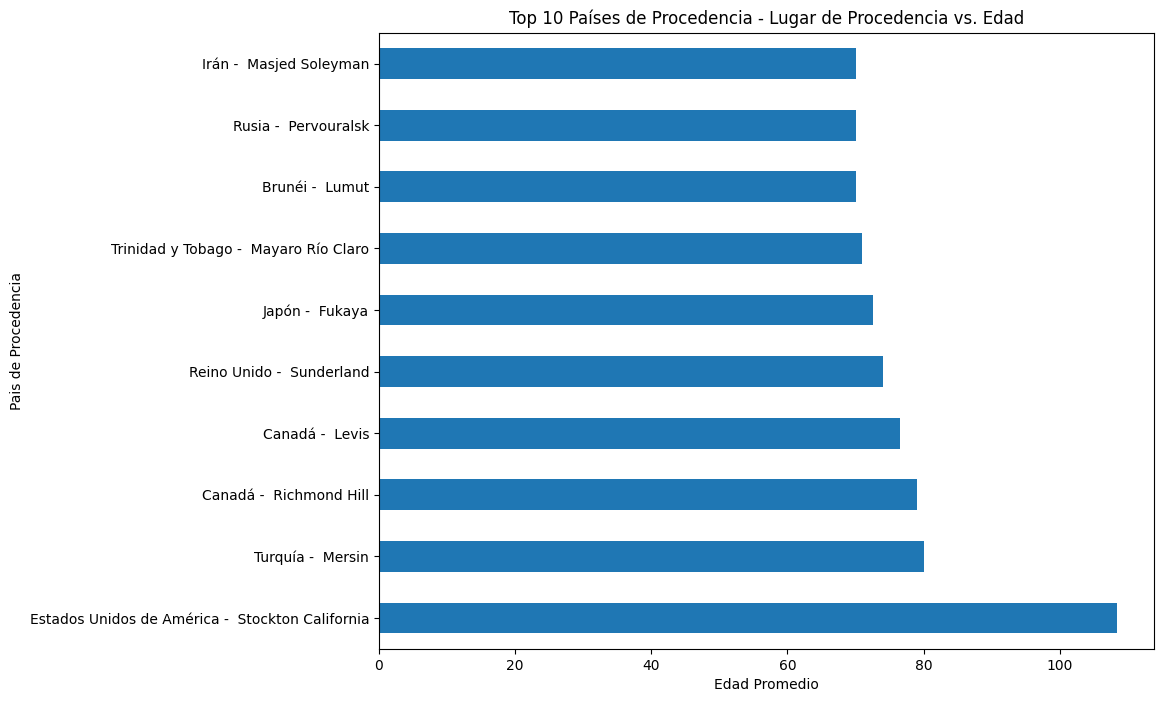

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama 'lug_proc'

# Primero, crea una nueva columna que combine las variables pro_jefm1 y tip_movi1
lug_proc['provincia_tipo'] = lug_proc['pais_prod1'] + ' - ' + lug_proc['lug_prod1']


# Agregar las etiquetas de datos sobre cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Luego, agrupa por la nueva columna y calcula la edad promedio
df_grouped = lug_proc.groupby('provincia_tipo')['edad'].mean()

# Ordena los datos por edad promedio de forma descendente
df_grouped_sorted = df_grouped.sort_values(ascending=False)

# Selecciona las 10 primeras filas
top_10 = df_grouped_sorted.head(10)

plt.figure(figsize=(10, 8))

# Grafica los resultados
top_10.plot(kind='barh')
plt.xlabel('Edad Promedio')
plt.ylabel('Pais de Procedencia')
plt.title('Top 10 Países de Procedencia - Lugar de Procedencia vs. Edad')

plt.show()


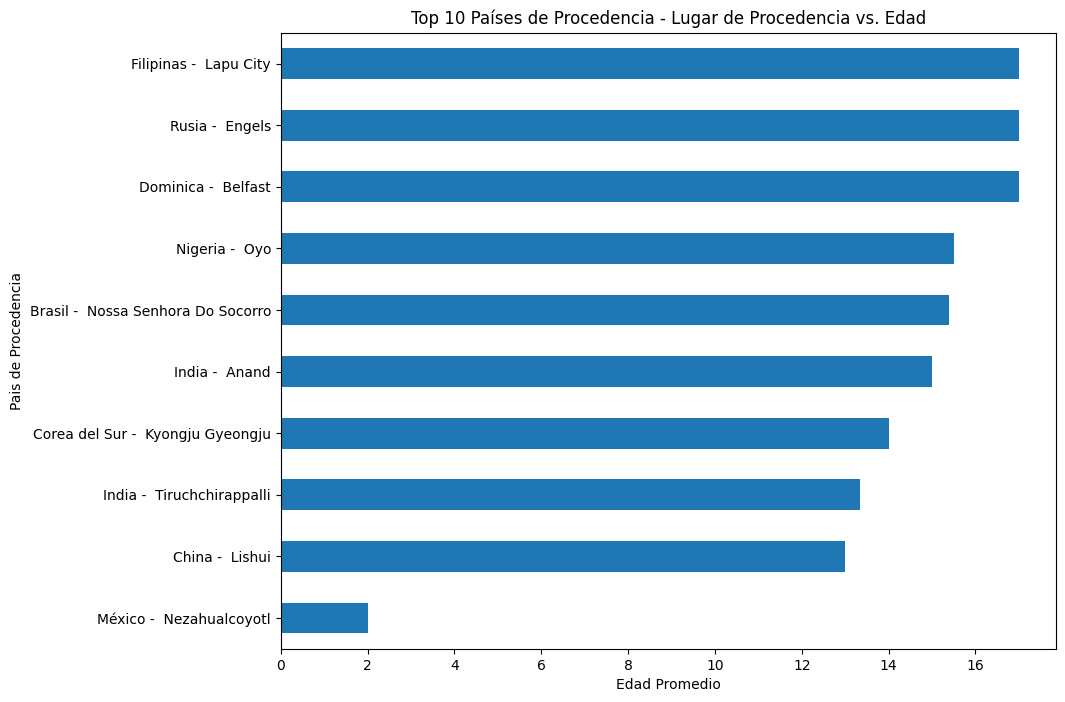

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama 'lug_proc'

# Primero, crea una nueva columna que combine las variables pro_jefm1 y tip_movi1
lug_proc['provincia_tipo'] = lug_proc['pais_prod1'] + ' - ' + lug_proc['lug_prod1']

# Luego, agrupa por la nueva columna y calcula la edad promedio
df_grouped = lug_proc.groupby('provincia_tipo')['edad'].mean()

# Ordena los datos por edad promedio de forma descendente
df_grouped_sorted = df_grouped.sort_values(ascending=True)

# Selecciona las 10 primeras filas
top_10 = df_grouped_sorted.head(10)

plt.figure(figsize=(10, 8))

# Grafica los resultados
top_10.plot(kind='barh')
plt.xlabel('Edad Promedio')
plt.ylabel('Pais de Procedencia')
plt.title('Top 10 Países de Procedencia - Lugar de Procedencia vs. Edad')

plt.show()


C:\Users\Richard Edison\AppData\Local\Temp\ipykernel_20340\1475402739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lug_proc_entradas['provincia_tipo'] = lug_proc_entradas['pais_prod1'] + ' - ' + lug_proc_entradas['tip_mov1']


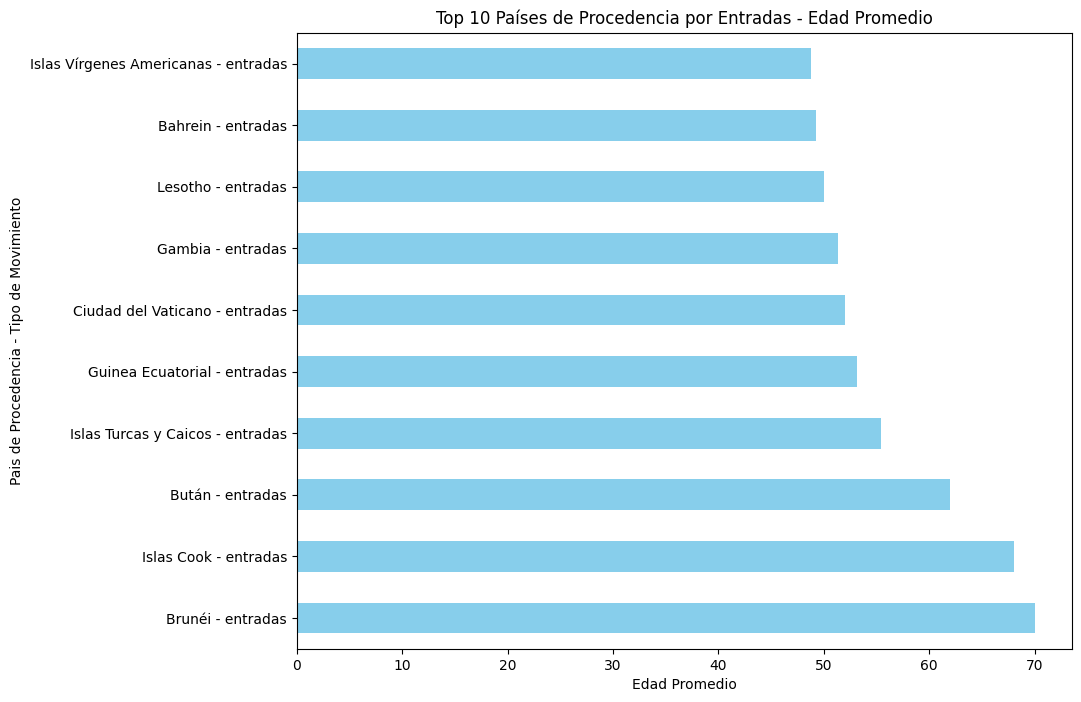

In [39]:
# Supongamos que tu DataFrame se llama 'lug_proc'
# Filtrar solo por entradas
lug_proc_entradas = lug_proc[lug_proc['tip_mov1'] == 'entradas']

# Crear una nueva columna que combine las variables pais_prod1 y tip_mov1
lug_proc_entradas['provincia_tipo'] = lug_proc_entradas['pais_prod1'] + ' - ' + lug_proc_entradas['tip_mov1']

# Agrupar por la nueva columna y calcular la edad promedio
df_grouped = lug_proc_entradas.groupby('provincia_tipo')['edad'].mean()

# Ordenar los datos por edad promedio de forma ascendente
df_grouped_sorted = df_grouped.sort_values(ascending=False)

# Selecciona las 10 primeras filas
top_10 = df_grouped_sorted.head(10)

# Configuración del gráfico
plt.figure(figsize=(10, 8))
top_10.plot(kind='barh', color='skyblue')
plt.xlabel('Edad Promedio')
plt.ylabel('Pais de Procedencia - Tipo de Movimiento')
plt.title('Top 10 Países de Procedencia por Entradas - Edad Promedio')
plt.show()

In [40]:
result10 = lug_proc.groupby(["tip_mov1", "pais_prod1", "tip_naci1"])["contador"].sum().reset_index()
result10

,tip_mov1,pais_prod1,tip_naci1,contador
0,entradas,Afganistán,ecuatorianos,3
1,entradas,Afganistán,extranjeros,5
2,entradas,Albania,ecuatorianos,5
3,entradas,Albania,extranjeros,38
4,entradas,Alemania,ecuatorianos,5239
...,...,...,...,...
754,salidas,Yibuti,extranjeros,1
755,salidas,Zambia,ecuatorianos,4
756,salidas,Zambia,extranjeros,4
757,salidas,Zimbabue,ecuatorianos,4


     tip_mov1                 pais_prod1    tip_naci1  contador
61   entradas  Estados Unidos de América  extranjeros    417879
44   entradas                   Colombia  extranjeros    251806
151  entradas                       Perú  extranjeros    135648
59   entradas                     España  extranjeros    105186
147  entradas                     Panamá  extranjeros     42143
..        ...                        ...          ...       ...
158  entradas   República Centroafricana  extranjeros         1
104  entradas                     Jersey  extranjeros         1
111  entradas                       Laos  extranjeros         1
112  entradas                    Lesotho  extranjeros         1
95   entradas                 Islas Cook  extranjeros         1

[203 rows x 4 columns]


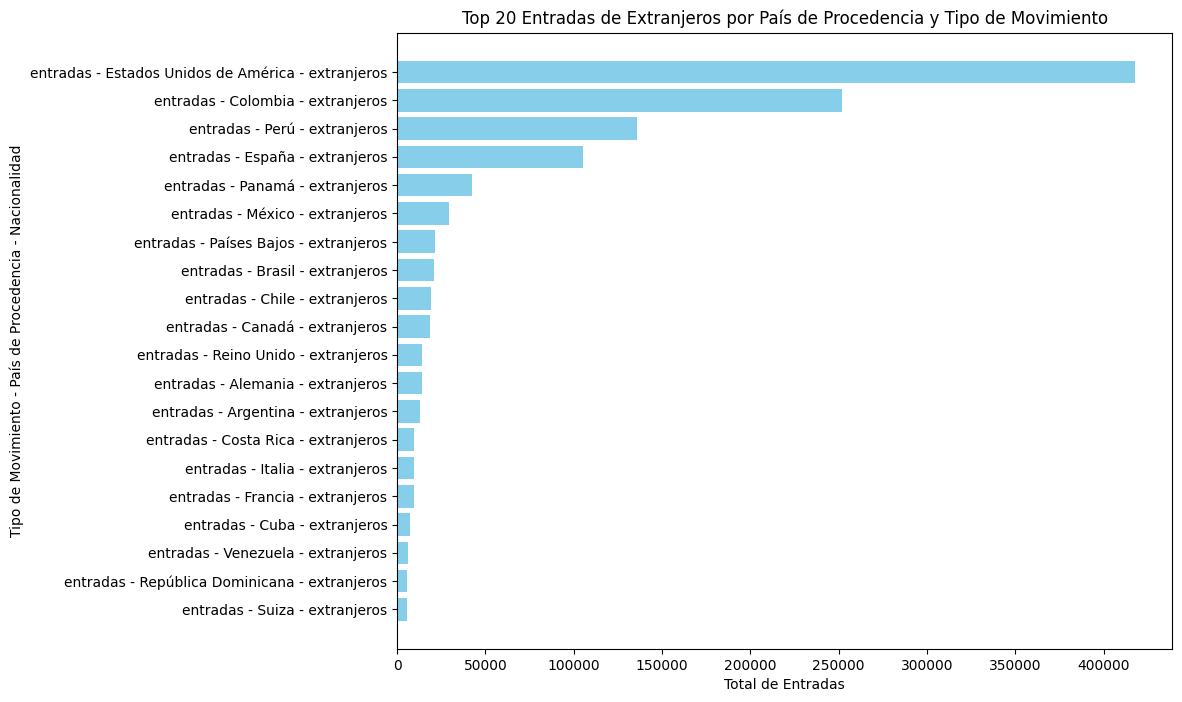

In [41]:
# Filtrar el DataFrame para incluir solo registros donde 'tip_mov1' es 'entradas' y 'tip_naci1' es 'extranjeros'
entradas_extranjeros_df = lug_proc[(lug_proc['tip_mov1'] == 'entradas') & (lug_proc['tip_naci1'] == 'extranjeros')]

# Agrupar por tipo de movimiento, país de procedencia y tipo de nacionalidad, sumar los contadores
result10 = entradas_extranjeros_df.groupby(["tip_mov1", "pais_prod1", "tip_naci1"])["contador"].sum().reset_index()

# Ordenar los resultados en orden descendente por el contador
result10_sorted = result10.sort_values(by='contador', ascending=False)

# Mostrar el DataFrame resultante
print(result10_sorted)

# Opcionalmente, si deseas visualizar los resultados en un gráfico:
# Selecciona las 20 primeras filas para visualizar solo el top 20
top_20 = result10_sorted.head(20)
# Configuración del gráfico
plt.figure(figsize=(10, 8))
# Ajustar cómo se extraen los valores de las etiquetas para el gráfico
labels = top_20['tip_mov1'] + ' - ' + top_20['pais_prod1'] + ' - ' + top_20['tip_naci1']
plt.barh(labels, top_20['contador'], color='skyblue')
plt.xlabel('Total de Entradas')
plt.ylabel('Tipo de Movimiento - País de Procedencia - Nacionalidad')
plt.title('Top 20 Entradas de Extranjeros por País de Procedencia y Tipo de Movimiento')
plt.gca().invert_yaxis()  # Invertir el eje y para que las barras más altas estén en la parte superior
plt.show()

C:\Users\Richard Edison\AppData\Local\Temp\ipykernel_20340\1573739090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lug_proc_entradas['provincia_tipo'] = lug_proc_entradas['pais_prod1'] + ' - ' + lug_proc_entradas['tip_mov1']


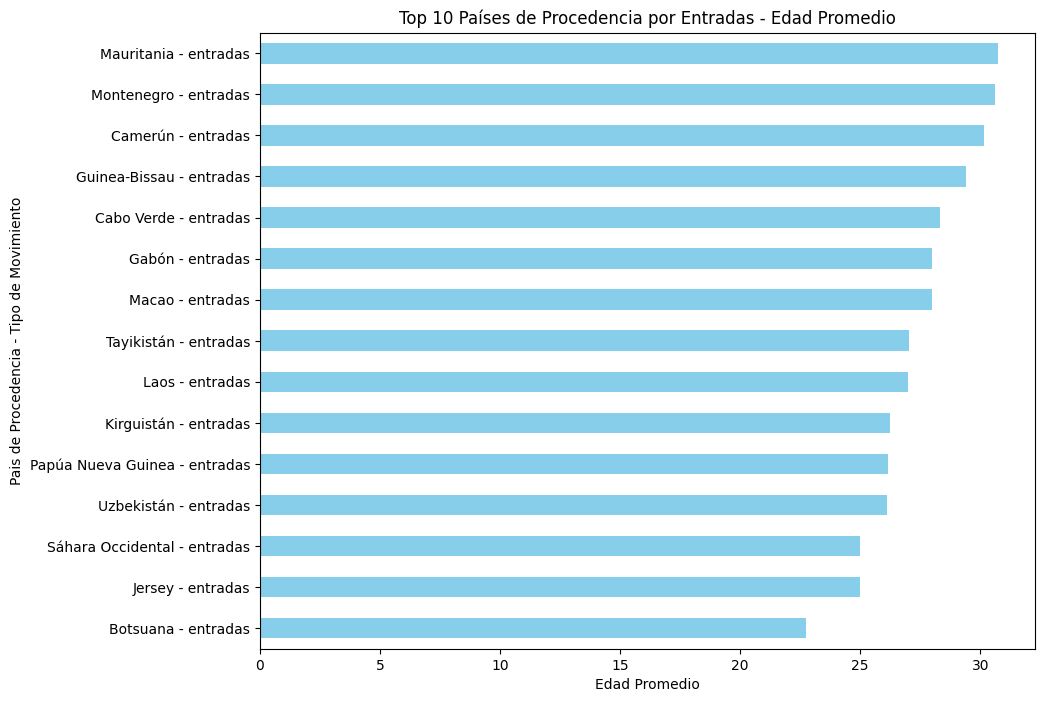

In [42]:
# Supongamos que tu DataFrame se llama 'lug_proc'
# Filtrar solo por entradas
lug_proc_entradas = lug_proc[lug_proc['tip_mov1'] == 'entradas']

# Crear una nueva columna que combine las variables pais_prod1 y tip_mov1
lug_proc_entradas['provincia_tipo'] = lug_proc_entradas['pais_prod1'] + ' - ' + lug_proc_entradas['tip_mov1']

# Agrupar por la nueva columna y calcular la edad promedio
df_grouped = lug_proc_entradas.groupby('provincia_tipo')['edad'].mean()

# Ordenar los datos por edad promedio de forma ascendente
df_grouped_sorted = df_grouped.sort_values(ascending=True)

# Selecciona las 10 primeras filas
top_10 = df_grouped_sorted.head(15)

# Configuración del gráfico
plt.figure(figsize=(10, 8))
top_10.plot(kind='barh', color='skyblue')
plt.xlabel('Edad Promedio')
plt.ylabel('Pais de Procedencia - Tipo de Movimiento')
plt.title('Top 10 Países de Procedencia por Entradas - Edad Promedio')
plt.show()

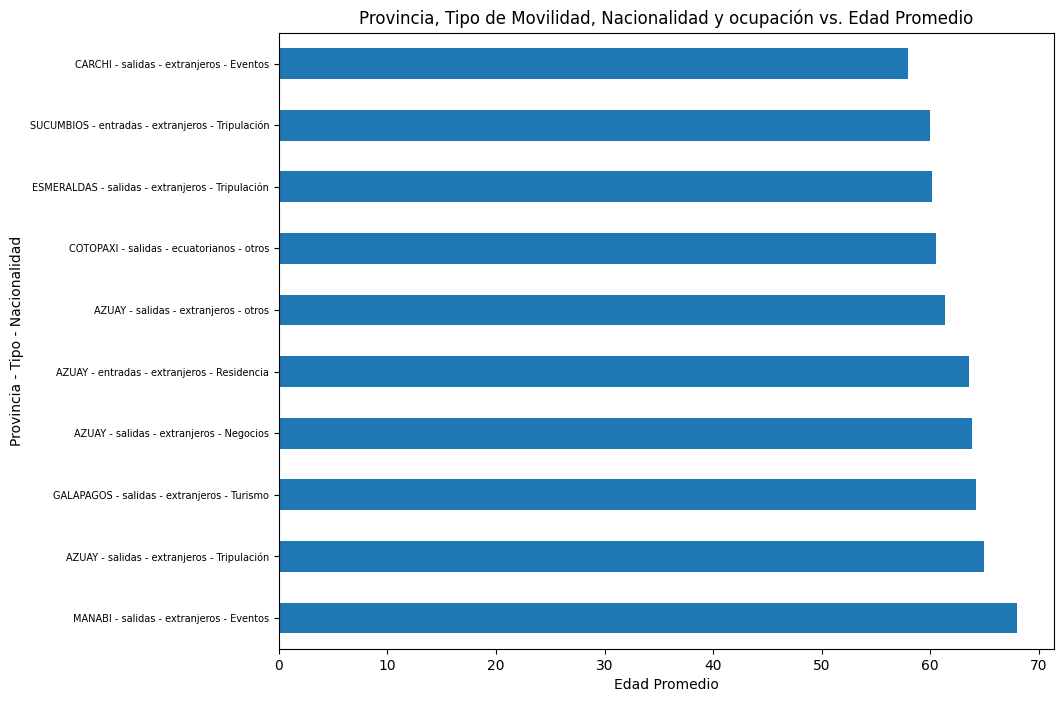

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama 'lug_proc'

# Primero, crea una nueva columna que combine las variables pro_jefm1, tip_mov1 y tip_naci1
lug_proc['provincia_tipo'] = lug_proc['pro_jefm1'] + ' - ' + lug_proc['tip_mov1'] + ' - ' + lug_proc['tip_naci1'] + ' - ' + lug_proc['mot_viam1']

# Luego, agrupa por la nueva columna y calcula la edad promedio
df_grouped = lug_proc.groupby('provincia_tipo')['edad'].mean()

# Ordena los datos por edad promedio de forma descendente
df_grouped_sorted = df_grouped.sort_values(ascending=False)

# Selecciona las 10 primeras filas
top_10 = df_grouped_sorted.head(10)

# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 8))

# Finalmente, grafica los resultados
top_10.plot(kind='barh')
plt.xlabel('Edad Promedio')
plt.ylabel('Provincia - Tipo - Nacionalidad')
plt.title('Provincia, Tipo de Movilidad, Nacionalidad y ocupación vs. Edad Promedio')

# Ajusta el tamaño de la fuente de los nombres de las barras
plt.yticks(fontsize=7)

plt.show()


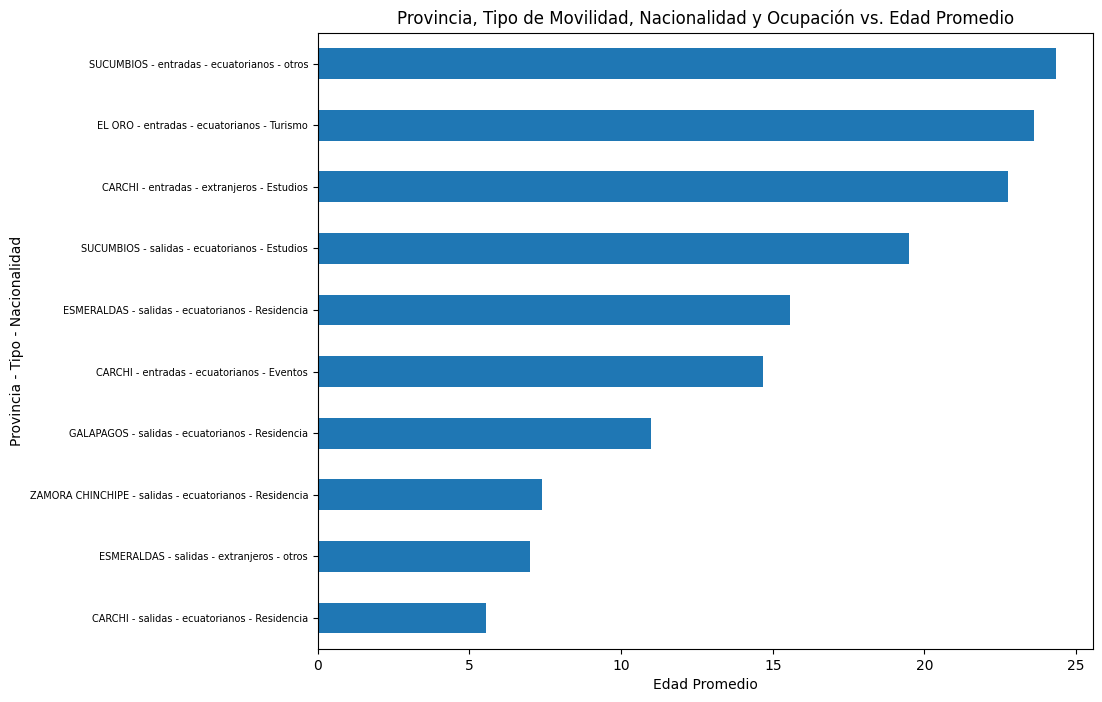

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama 'lug_proc'

# Primero, crea una nueva columna que combine las variables pro_jefm1, tip_mov1 y tip_naci1
lug_proc['provincia_tipo'] = lug_proc['pro_jefm1'] + ' - ' + lug_proc['tip_mov1'] + ' - ' + lug_proc['tip_naci1'] + ' - ' + lug_proc['mot_viam1']

# Luego, agrupa por la nueva columna y calcula la edad promedio
df_grouped = lug_proc.groupby('provincia_tipo')['edad'].mean()

# Ordena los datos por edad promedio de forma descendente
df_grouped_sorted = df_grouped.sort_values(ascending=True)

# Selecciona las 10 primeras filas
top_10 = df_grouped_sorted.head(10)

# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 8))

# Finalmente, grafica los resultados
top_10.plot(kind='barh')
plt.xlabel('Edad Promedio')
plt.ylabel('Provincia - Tipo - Nacionalidad')
plt.title('Provincia, Tipo de Movilidad, Nacionalidad y Ocupación vs. Edad Promedio')

# Ajusta el tamaño de la fuente de los nombres de las barras
plt.yticks(fontsize=7)

plt.show()
